## Plotting in Python

You can find an introduction to the plotting library matplotlib here: <https://matplotlib.org/tutorials/introductory/pyplot.html>

In [1]:
# Import packages
import numpy as np # package for work with arrays and matrices
import matplotlib.pyplot as plt # package with plotting capabilities

### arrays and basic plotting

Here is an example of performing calculations with arrays (vectors) of values and plotting the results: 

(100,)


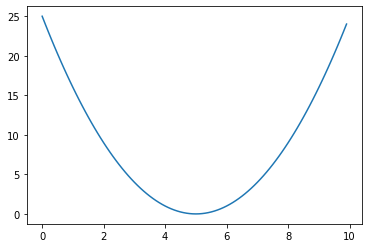

In [2]:
x = np.arange(0,10,0.1) # create an array of numbers between 0 and 10 with step 0.1
print(np.shape(x))
y = (x-5)**2 # do calculations on all the array values, call it y
plt.plot(x,y) # plot x vs y
plt.show()

A two dimensional array (matrix) can be defined as follows, and the function np.shape prints out the number of rows and columns in the matrix:

In [5]:
x = np.array([[1,2,3],[4,5,6]])
print(np.shape(x))
print(x)

(2, 3)
[[1 2 3]
 [4 5 6]]


Strings to make text for plots
An example of concatenating a text string together with a numeric variable, which can then be used for labels or legends in plots:

In [17]:
prob = 0.5
string1 = 'The value of prob is ' + str(prob)
print(string1)

The value of prob is 0.5


## Numeric solutions of discrete models

Difference equations, as we saw above, can be written in the form of $x_{t+1} = f(x_t)$. At every step, the model takes the current value of the dependent variable $x_t$, feeds it into the function $f(x)$, and takes the output as the next value $x_{t+1}$. The same process repeats every iteration, which is why difference equations written in this form are called *iterated maps*.

Computers are naturally suited for precise, repetitive operations. In our first example of a computational algorithm, we will iterate a given function to produce a sequence of values of the dependent variable $x$. We only need two things: to specify a computer function $f(x)$, which returns the value of the iterated map for any input value $x$, and the initial value $x_0$. Then it is a matter of repeating the operation of evaluating $f(x_t)$ and storing it as the next value $x_{t+1}$. Below is the pseudocode for the algorithm. Note that I will use arrows to indicated variable assignment, square brackets $[]$ for indexing of
vector, and start indexing at 0, consistent with python convention.

```{admonition} Iterative solution of difference equations
:class: tip 
 * define the iterated map function $F(x)$ 
 * set $N$ to be the number of iterations (time steps) 
 * set the initial condition $x_0$
 * initialize array $x$ with initial value $x_0$
 * for $i$ from 0 to $N-1$
   - $x[i+1] \gets F(x[i])$
```

The resulting sequence of values $x_0, x_1, x_2, ... , x_N$ is called a *numeric solution* of the given difference equation. It has two disadvantages compared to an analytic solution: first, the solution can only be obtained for a specific initial value and number of iterations, and second, any computer simulation inevitably introduces some errors, for instance from round-off. In practice, however, most complex dynamical systems have to solved numerically, as analytical solutions are difficult or impossible to find.

### using for loops for iterative solutions of dynamic models

Here is a generic linear demographic model

$$ 
x(t+1) = x(t) + bx(t) - dx(t) = rx(t)
$$

Example of a script for producing a numeric solution of a discrete time dynamic model:

In [ ]:
numsteps = 20 # number of iterations
birth = 0.8 # birth rate
death =  0.5 # death rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 1 # initial value 
t = np.arange(numsteps+1) # initialze time vector
print(t)
for i in range(numsteps):
     pop[i+1] = pop[i] + birth*pop[i] - death*pop[i]# linear demographic model
plt.plot(t, pop) # plot solution
plt.xlabel('time')
plt.ylabel('population')
title = 'Solution with birth rate ' + str(birth) + ' and death rate ' + str(death)
plt.title(title) 
plt.show()

### Plotting multiple curves with a legend

Multiple solution plots can be overlayed on the same figure, as long as the plt.show() is only used once in the end. For multiple graphs it's best to use multiple colors and a legend to label different curves, using the option label in the plt.plot function and adding the function plt.legend() before producing the figure. Here's an example with solutions of the demographic model with different death rates:

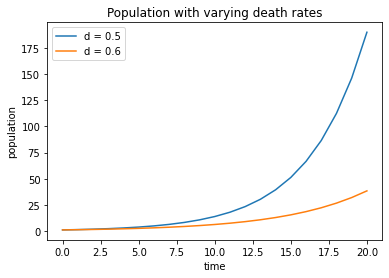

In [3]:
numsteps = 20 # number of iterations
birth = 0.8 # birth rate
death =  0.5 # death rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 1 # initial value 
t = np.arange(numsteps+1) # initialze time vector
for i in range(numsteps):
     pop[i+1] = pop[i] + birth*pop[i] - death*pop[i]# linear demographic model

plt.plot(t, pop, label = 'd = '+str(death)) # plot solution
plt.xlabel('time')
plt.ylabel('population')

death =  0.6 # death rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 1 # initial value 
t = np.arange(numsteps+1) # initialze time vector
for i in range(numsteps):
     pop[i+1] = pop[i] + birth*pop[i] - death*pop[i]# linear demographic model
plt.plot(t, pop, label = 'd = '+str(death)) # plot solution

title = 'Population with varying death rates'
plt.title(title) 
plt.legend()
plt.show()

### Random number generators

Numpy provides a varietry of random number generators, and we'll use these functions in the course for many purposes. Here is an example of producing arrays of random normally distributed numbers. The function requires inputs of the mean, the standard deviation, and the number of random values (or size of the array):

In [ ]:
mu = 5
sigma = 0.5
num = 30
norm_sample = np.random.normal(mu, sigma, num)
print(norm_sample)
print("The mean of the sample is " + str(np.mean(norm_sample)))
print("The standard deviation of the sample is " + str(np.std(norm_sample)))